# **Assignment 3:** Tokenization Using TextBlob Words
### Emily Daskas

In [ ]:
from textblob import TextBlob
import nltk
nltk.download('punkt')
nltk.download('brown')
nltk.download('stopwords')
from nltk.corpus import stopwords

from operator import itemgetter

import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import imageio
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
textTotal = open('/RomeoJuliet.txt').read()
blobTotal = TextBlob(textTotal)

numChars = 1000
text1000 = textTotal[0:numChars+1]
blob1000 = TextBlob(text1000)

**Analysis of Words**

1. Count and display the words in the first 1,000 characters of the text. Display all the words by
printing 10 words per line.

In [ ]:
def print_words(list_words, num_elems):
  for j in range(0, len(list_words), num_elems):
    for i in range(j, j+num_elems):
      if (i >= len(list_words)):
        break
      print(i, '.', list_words[i], end = ',  ')
    print()
  print()

print_words(blob1000.words, 10)
print("Count of words in first 1000 chars:", len(blob1000.words))

0 . Project,  1 . Gutenberg,  2 . ’,  3 . s,  4 . Romeo,  5 . and,  6 . Juliet,  7 . by,  8 . William,  9 . Shakespeare,  
10 . This,  11 . eBook,  12 . is,  13 . for,  14 . the,  15 . use,  16 . of,  17 . anyone,  18 . anywhere,  19 . in,  
20 . the,  21 . United,  22 . States,  23 . and,  24 . most,  25 . other,  26 . parts,  27 . of,  28 . the,  29 . world,  
30 . at,  31 . no,  32 . cost,  33 . and,  34 . with,  35 . almost,  36 . no,  37 . restrictions,  38 . whatsoever,  39 . You,  
40 . may,  41 . copy,  42 . it,  43 . give,  44 . it,  45 . away,  46 . or,  47 . re-use,  48 . it,  49 . under,  
50 . the,  51 . terms,  52 . of,  53 . the,  54 . Project,  55 . Gutenberg,  56 . License,  57 . included,  58 . with,  59 . this,  
60 . eBook,  61 . or,  62 . online,  63 . at,  64 . www.gutenberg.org,  65 . If,  66 . you,  67 . are,  68 . not,  69 . located,  
70 . in,  71 . the,  72 . United,  73 . States,  74 . you,  75 . ’,  76 . ll,  77 . have,  78 . to,  79 . check,  
80 . the,  8

2. Count the words in the entire text.

In [ ]:
len(blobTotal.words)

30796

3. Count the unique words in the entire text.

In [ ]:
dict_uniqueword_freq = blobTotal.word_counts.items()
len(dict_uniqueword_freq)

4145

4. Count the unique words in the entire text after removing the stop-words from the list.

In [ ]:
stop_words = stopwords.words('english')
unique_word_freq_wo_stop = []

for i in dict_uniqueword_freq:
  if i[0] not in stop_words:
    unique_word_freq_wo_stop.append(i)
print(len(unique_word_freq_wo_stop))


4017


5. Print the top-10 words in the entire text with highest frequency. Also display words’ frequency.

In [ ]:
sorted_by_freq = sorted(list(dict_uniqueword_freq), key = itemgetter(1), reverse = True)
top_10_frequencies = sorted_by_freq[0:10]

pd.DataFrame(top_10_frequencies, columns = ['word', 'frequency'])

,word,frequency
0,the,876
1,’,869
2,and,808
3,i,655
4,to,626
5,a,542
6,of,519
7,in,395
8,is,372
9,that,369


6. Print the top-10 words in the entire text with highest frequency after removing the stop-words from the list. Also display words’ frequency.

In [ ]:
sorted_by_freq_wo_stop = sorted(list(unique_word_freq_wo_stop), key = itemgetter(1), reverse = True)
top_10_frequencies_wo_stop = sorted_by_freq_wo_stop[0:10]

pd.DataFrame(top_10_frequencies_wo_stop, columns = ['word', 'frequency'])

,word,frequency
0,’,869
1,romeo,320
2,thou,278
3,juliet,195
4,thy,170
5,capulet,163
6,nurse,149
7,love,148
8,thee,138
9,lady,117


7. Count and display the noun-phrases in the first 1,000 characters of the text. Display all the noun-phrases by printing 3 noun-phrases per line.


In [ ]:
print_words(blob1000.noun_phrases, 3)
len(blob1000.noun_phrases)

0 . project gutenberg,  1 . ’ s,  2 . romeo,  
3 . juliet,  4 . william shakespeare,  5 . restrictions whatsoever,  
6 . project gutenberg license,  7 . ’ ll,  8 . title,  
9 . romeo,  10 . juliet author,  11 . william shakespeare release date,  
12 . november,  13 . etext,  14 . updated,  
15 . january,  16 . language,  17 . english character,  
18 . utf-8,  19 . start of this project gutenberg ebook romeo and juliet,  20 . pg shakespeare team,  
21 . project gutenberg,  22 . the tragedy of romeo and juliet,  23 . william shakespeare contents the prologue,  
24 . act,  25 . scene,  26 . public place,  
27 . scene ii,  28 . sc,  



29

8. Count the noun-phrases in the entire text.

In [ ]:
len(blobTotal.noun_phrases)

5036

9. Print the top-10 noun-phrases in the entire text with highest frequency. Also display noun-
phrases’ frequency.

In [ ]:
dictionary = dict(blobTotal.np_counts)
sorted_noun_frequencies = sorted(dictionary, key = dictionary.get, reverse=True)[0:10]
for i in range(0,10):
  key = sorted_noun_frequencies[i]
  value = dictionary[key]
  print(key + ' repeats ' + str(value) + ' times ')

romeo repeats 297 times 
juliet repeats 177 times 
nurse repeats 132 times 
capulet repeats 106 times 
’ s repeats 98 times 
mercutio repeats 86 times 
tybalt repeats 75 times 
benvolio repeats 72 times 
friar lawrence repeats 69 times 
’ ll repeats 68 times 



10. Print the words in the entire text that contain a string “WA”.

In [ ]:
for word in blobTotal.words:
  if 'WA' in word:
    print(word)

WATCH
WATCH
WATCH
WATCH
WATCH
WATCH
WATCH
WATCH
WARRANTY
WARRANTY
WARRANTIES
WARRANTIES


11. Visualize Word Frequencies. Create WordClouds for the entire text. Use any one of the following 4 masks.
a. Heart b. Circle c. Star d. Oval
The image files for all the 4 masks are provided in the .png file format.

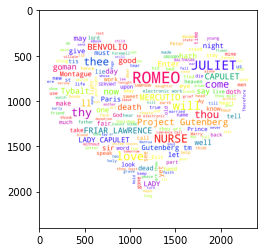

In [ ]:
mask_image = imageio.imread(str('/mask_heart.png'))
word_cloud = WordCloud(colormap = 'prism', mask = mask_image, background_color = 'white')
word_cloud_image = word_cloud.generate(textTotal)

word_cloud_file = word_cloud_image.to_file('romeo.png')
word_cloud_image.to_image
im = Image.open('romeo.png')
fig,aux = plt.subplots()
aux.imshow(im)
